In [1]:
from adam import ADAM
from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes, ZFeatureMap
import numpy as np
from qiskit.quantum_info import Statevector
from math import log

In [2]:
# size of training data set
training_size = 100
# dimension of data sets
n = 2
from sklearn import datasets
from sklearn import preprocessing
iris = datasets.load_iris()
# load iris and normalise
x = preprocessing.normalize(iris.data)
x1_train = x[0:49, :] # class A
x2_train = x[50:99, :] # class B
training_input = {'A':x1_train, 'B':x2_train}
class_labels = ['A', 'B']

In [3]:
sv = Statevector.from_label('0' * n)

In [4]:
def final_circuit(circuit, data, params):
    for i in range(n):
        circuit.h(i)
        circuit.rz(data[i],i)
        circuit.ry(data[i+2],i)
        circuit.ry(params[i], i)
    circuit.cx(0,1)
    for i in range(n):
        circuit.rz(data[i],i)
        circuit.ry(data[i+2],i)
        circuit.ry(params[i+2], i)
    for i in range(n):
        circuit.rz(data[i],i)
        circuit.ry(data[i+2],i)
        circuit.ry(params[i+4], i)

In [12]:
def assign_label(bit_string, class_labels):
    hamming_weight = sum([int(k) for k in list(bit_string)])
    is_odd_parity = hamming_weight & 1
    if is_odd_parity:
        return class_labels[1]
    else:
        return class_labels[0]

def return_probabilities(counts, class_labels):
    shots = sum(counts.values())
    result = {class_labels[0]: 0,
              class_labels[1]: 0}
    for key, item in counts.items():
        label = assign_label(key, class_labels)
        result[label] += counts[key]/shots
    return result

def classify(x_list, params, class_labels):
    qc_list = []
    for x in x_list:
        circuit = QuantumCircuit(n)
        circ_ = final_circuit(circuit, x, params)
        qc = sv.evolve(circuit)
        qc_list += [qc]
    probs = []
    for qc in qc_list:
        counts = qc.probabilities_dict()
        prob = return_probabilities(counts, class_labels)
        probs += [prob]
    return probs


def CrossEntropy(yHat, y):
    if y == 'A':
      return -log(yHat['A'])
    else:
      return -log(1-yHat['A'])


def cost_function(training_input, class_labels, params, shots=100, print_value=False):
    # map training input to list of labels and list of samples
    cost = 0
    training_labels = []
    training_samples = []
    for label, samples in training_input.items():
        for sample in samples:
            training_labels += [label]
            training_samples += [sample]

    # classify all samples
    probs = classify(training_samples, params, class_labels)

    # evaluate costs for all classified samples
    for i, prob in enumerate(probs):
        # cost += cost_estimate_sigmoid(prob, training_labels[i])
        cost += CrossEntropy(yHat=prob, y=training_labels[i])
    cost /= len(training_samples)

    # return objective value
    #print(cost)
    return cost


# setup the optimizer
optimizer = ADAM(maxiter=100, lr=0.1)

# define objective function for training
objective_function = lambda params: cost_function(training_input, class_labels, params, print_value=True)

d = 6  # num of trainable params
for i in range(100):
    np.random.seed(i)
    # randomly initialize the parameters
    init_params = np.random.uniform(-1,1,6)
    print(init_params)
    # train classifier
    init_params = np.random.uniform(-1,1,6)
    opt_params, value, _, loss = optimizer.optimize(len(init_params), objective_function, initial_point=init_params)
    print(loss)
    print(opt_params)
    # print results
    f1 = 'quantum_loss_easy_layer3h_%d.npy' %i
    f2 = 'opt_params_easy_layer3h_%d.npy'%i
    np.save(f2, opt_params)
    np.save(f1, loss)

hello
[ 0.09762701  0.43037873  0.20552675  0.08976637 -0.1526904   0.29178823]
[0.6821390528758016, 0.5420028944379843, 0.4909030386625905, 0.5146079491668007, 0.5563493231864416, 0.5714036551615279, 0.5559588478804659, 0.5242231652385986, 0.491921081076427, 0.46967341616780894, 0.46108479518763357, 0.4635230651400373, 0.47090858750782366, 0.4771617642877825, 0.47843673571621126, 0.47356616825758113, 0.4635079710053949, 0.4505671783474423, 0.43759903049533716, 0.42716685737961885, 0.42073513290411574, 0.4181633426501799, 0.4178120365551909, 0.41734855113876607, 0.4148882279315466, 0.40981255282565143, 0.40284124155615403, 0.39546906345708777, 0.3891854423498498, 0.38485676279438435, 0.38247661484753076, 0.3813185985522495, 0.3803744538169025, 0.3788512523637316, 0.3764950182661004, 0.37362008710509303, 0.3708764433852861, 0.3688946112213791, 0.36797807768356, 0.3679796847894267, 0.36841225498267743, 0.36872455070151294, 0.3685813492730861, 0.36799116473006677, 0.36723235671292925, 0.3

[0.6763543459904396, 0.561827444567216, 0.4835770258656978, 0.45443205546739496, 0.46821861272105675, 0.4935431616337331, 0.5014642384502714, 0.48696597756095106, 0.4586901821782022, 0.42768252412761315, 0.40295127456998114, 0.3896364084468329, 0.3880965839096812, 0.3941783627210606, 0.4012612255422695, 0.4035603671611019, 0.3987627032378154, 0.3884641263450107, 0.37663456393246314, 0.367348895623072, 0.36289247847430567, 0.36290382204189797, 0.3648483652690694, 0.3655968370213272, 0.3631983600569124, 0.35776076512962957, 0.3510531011004204, 0.3453055438919991, 0.34197630230509807, 0.34108371529143994, 0.34138188677183384, 0.3412409835172983, 0.3396629404558081, 0.3367753253519147, 0.3335651977462222, 0.33114767795981237, 0.3300775489183361, 0.3300899014402242, 0.3303693900342384, 0.3301296226765909, 0.3290981676419421, 0.3276023540032637, 0.326260265651724, 0.32553771964114603, 0.32547003868364166, 0.32570010173977604, 0.32576675931348176, 0.32542069121423084, 0.32475169828907696, 0.3

[0.5569946463281514, 0.4701575414423687, 0.42700346622368807, 0.4402773390746227, 0.4619557534060109, 0.4538334239236069, 0.4254499853314533, 0.39570919552869716, 0.3770506897341795, 0.37311511574081024, 0.37941437349760504, 0.3869111262846194, 0.3883067852782494, 0.38208470957242563, 0.3717277273039037, 0.36247763192939664, 0.3581474677940677, 0.3592394378193288, 0.36305818953052615, 0.3657402468701723, 0.3648016770536749, 0.3603846830901863, 0.35467931183314694, 0.350303831975945, 0.3486747113552161, 0.3492158474359771, 0.3499186746201934, 0.3489110571421605, 0.34578250027519203, 0.34165893462388, 0.33819516405318173, 0.33637603166672364, 0.3359337470498129, 0.3357125178575413, 0.3346579616668578, 0.33261561818985713, 0.33032236329895787, 0.32871497540715205, 0.3281914036628445, 0.32838631876258734, 0.3285607997942649, 0.3282216496716863, 0.327447894096482, 0.32671437914738066, 0.3264340631365345, 0.3266218310748733, 0.3269322057052556, 0.32699379746987356, 0.3267195559229127, 0.3263

[0.47692847790267695, 0.381266990451086, 0.3627731901639606, 0.3974417079808338, 0.4257517935505177, 0.42214227095256884, 0.39747796902782817, 0.36943260372467984, 0.35086706214945806, 0.34702601235902675, 0.3553506018580694, 0.3678608472407482, 0.3762059791835498, 0.37625359996647934, 0.36906989712931954, 0.3589181768159179, 0.3505249509897205, 0.3469415300219072, 0.3484784847710415, 0.35292998249010105, 0.35699009548201316, 0.35811230836647356, 0.35570768416019893, 0.3511109413260355, 0.34659077816999095, 0.344072062380086, 0.34419518376596914, 0.3461293016349736, 0.34820004331883675, 0.3489234212501003, 0.34778921624928116, 0.3453753091064897, 0.34285119502474354, 0.34124163099791816, 0.340868785096474, 0.3412574250138163, 0.3415239063799424, 0.34097278294445843, 0.33950036743186507, 0.33757064508981427, 0.33584257382636795, 0.3347348066622347, 0.33420553723645036, 0.33385434821577586, 0.3332385553962302, 0.33217123020332073, 0.3308110589927333, 0.32951680058323357, 0.32859337709165

[0.7745017519567573, 0.6670746201942694, 0.5797710723124353, 0.5203787955713561, 0.49502763869211636, 0.5007668885412593, 0.5190182772268579, 0.5292358643515256, 0.5243126639083531, 0.5077323372417787, 0.48570965543350053, 0.4634390879555501, 0.44427125742382834, 0.42982499797199125, 0.42026624295603626, 0.4146357901057484, 0.4112940236201863, 0.408491205673419, 0.40491690031578603, 0.40001113840230756, 0.39393474022612796, 0.3872849197518931, 0.3807387112429586, 0.3747798113356311, 0.36958134645436147, 0.3650387179118703, 0.36089748960185825, 0.3569022071575378, 0.35290452210953155, 0.348903933700337, 0.34502963732308645, 0.341487659280426, 0.33849347676586733, 0.3362022386970755, 0.3346498728388367, 0.33372624424975406, 0.3332022283708456, 0.33281202240599633, 0.3323562834196591, 0.33176841882504365, 0.3311033850744821, 0.3304597738779726, 0.3298916907435811, 0.3293696199505215, 0.3288083449672941, 0.3281311073048216, 0.32731847691978616, 0.3264089081958885, 0.32545642315013906, 0.32

[0.714967041304563, 0.651104770585954, 0.5728794873039744, 0.5125884928442511, 0.49602357099081607, 0.5095634274334572, 0.5120156590940723, 0.4909512254949109, 0.4552604953657411, 0.4192024227092982, 0.39439137376926436, 0.3852348921142729, 0.38662481966758455, 0.3874575566541334, 0.3799087095063009, 0.3646409208817716, 0.34812642272827415, 0.3372565456854617, 0.3350239810010422, 0.33890099390104383, 0.3430951940866903, 0.3432406214306774, 0.33914256946499627, 0.3337541251600047, 0.3304405168070252, 0.33071816974916163, 0.3334905586898428, 0.3360793364611649, 0.3362985024162666, 0.3338993587171795, 0.3303837716892915, 0.32768577829454365, 0.3268332406379215, 0.3274118593742189, 0.32808296499479855, 0.32771196058021884, 0.32619941538664937, 0.3244081208253186, 0.32337614956775534, 0.32350366484677134, 0.32431899804898884, 0.3249478026739967, 0.32484527507358013, 0.3241609041688229, 0.3234884204079984, 0.32329831431105177, 0.3235569994267901, 0.32382159014698375, 0.32367778563507343, 0.3

[0.813505602535393, 0.7445422558903128, 0.6681445031059601, 0.5900741062761031, 0.5182555248043029, 0.462386614476252, 0.4330312770139793, 0.42850954726741347, 0.4339708174321981, 0.4390313805378386, 0.44238042200488553, 0.444630044866799, 0.4447789637862106, 0.441478738149509, 0.43472412868650556, 0.425892149573, 0.41670151169826014, 0.4081512681540304, 0.4001410978153736, 0.3919819701078247, 0.3833098200880372, 0.3745817708115806, 0.3668327967719045, 0.3610358639588987, 0.3575622962822188, 0.3560213729567003, 0.3554915351910457, 0.35495818302681265, 0.3537034067498356, 0.3514798396238454, 0.3484602092982182, 0.34505968057730296, 0.34174119865464975, 0.3388763790781029, 0.3366867444881267, 0.33525200062375254, 0.33454963765735213, 0.3344907530724417, 0.33493686400901457, 0.3357064297476141, 0.3365896288275593, 0.33738086292105396, 0.3379202598386921, 0.3381245157146707, 0.3379916873341857, 0.33757993928860736, 0.33697429147880975, 0.3362593597291218, 0.3355077254851916, 0.334780665271

[0.5621643383039586, 0.5203965930576822, 0.5168753789227172, 0.519618491876145, 0.5118089724270449, 0.4908346438517784, 0.46147050419692764, 0.43085926547972053, 0.4055487494646068, 0.38931210312234, 0.3822055345379264, 0.3815266870880479, 0.38401247103332464, 0.3875338022576009, 0.39134376171886065, 0.3952943724750447, 0.39887038793934615, 0.40090292873110034, 0.4003475887593708, 0.39712511689160257, 0.39211207682099203, 0.38662766630762807, 0.3818838031492488, 0.3785754220945087, 0.3767315670197027, 0.3758981936370046, 0.3755280980893253, 0.3752914787463921, 0.37512138349976004, 0.3750503952896003, 0.3750240605592936, 0.37483572078564575, 0.3742127505645153, 0.3729872685650582, 0.37123804528130633, 0.3693029019015285, 0.3676323540247025, 0.366559005975472, 0.36612925668675406, 0.3661175210959783, 0.3662104368018066, 0.3662097707664108, 0.3660981826878973, 0.3659457098555209, 0.36577024032717464, 0.3654884142365278, 0.36499757999247173, 0.36429824510662573, 0.3635288155375416, 0.36287

[0.8653137651090795, 0.7907672072944141, 0.748573096182328, 0.7174762909106326, 0.687313129455284, 0.6565027099155757, 0.6265024516176584, 0.5980786199673463, 0.5704463525026688, 0.5429292480763734, 0.515791228783233, 0.4898099148496876, 0.4658497577068031, 0.44460393127384357, 0.42640172092354767, 0.41109637821384765, 0.39810949577569155, 0.38667418220139876, 0.3761980145762242, 0.36654710803346185, 0.35806379494695173, 0.35129467654910473, 0.3465886055949348, 0.34380747155167907, 0.3423428932051782, 0.34144772794598854, 0.34065320928335724, 0.3399559104294694, 0.33964764881285636, 0.33995536173779534, 0.3407926460919894, 0.34180314166479964, 0.34261701082057827, 0.34308260900821846, 0.3433064496425054, 0.34351473200156607, 0.3438607142331037, 0.3443086284839442, 0.34466375629815876, 0.3447166850111105, 0.34438504632440237, 0.34374695758459833, 0.34295890318256705, 0.34214088705812884, 0.3413183011285518, 0.3404496980476918, 0.3395015919542452, 0.33850368518105045, 0.33754299693837564

[0.438364526703706, 0.4215121420583697, 0.39652059206651163, 0.3784383939171581, 0.3707872778864607, 0.362326307873745, 0.35078814189757257, 0.34315220007203073, 0.34117782819806897, 0.33898246772798424, 0.3344583544824455, 0.3313175172856978, 0.33135839129592615, 0.33164022368079954, 0.3300272185496854, 0.3281964175919827, 0.3279899346866012, 0.3285246091011205, 0.32804220550432056, 0.32680394409993313, 0.32622059270408094, 0.3264239220678796, 0.3262784200527993, 0.3254457514019417, 0.3248276658822147, 0.3249339615201792, 0.32509123368250814, 0.3246945633084536, 0.3241553770104303, 0.32399166782996625, 0.3238865465374379, 0.32333925222821386, 0.3225787761109667, 0.32209043611183735, 0.3217834527599594, 0.32131777670656764, 0.32083298974817925, 0.3206677604273751, 0.3207184185334966, 0.3206939254437131, 0.32067465783475807, 0.3208535911435747, 0.3210799865479702, 0.32114736706556773, 0.3211607470140773, 0.32123293967311206, 0.32122845366267877, 0.321079047051973, 0.3209297914205581, 0.

[0.49581083139324, 0.4771311090936784, 0.46031003669946213, 0.44528985465544524, 0.4318220292861561, 0.4199211127171011, 0.4097336351249, 0.401153876379572, 0.3939778339374787, 0.38761334490507426, 0.3814661883390296, 0.37535126066387337, 0.36920954076961193, 0.36332386386434934, 0.35790487585602926, 0.3530197791373721, 0.34875725984389355, 0.3450251069029747, 0.34174691691800857, 0.3388441963342929, 0.33623710342260915, 0.333946843336234, 0.3319269379471859, 0.330192309332836, 0.32869990000610994, 0.32743135715429655, 0.3263579706237104, 0.32541503808441385, 0.3245550365900928, 0.3236944226981634, 0.3227837286616282, 0.3217744484948522, 0.3206481923998454, 0.31942564450949623, 0.3181355662514057, 0.3168305670697206, 0.31554615984634937, 0.3142996960830377, 0.3130781153820378, 0.3118299682066766, 0.31048758489698686, 0.3089668670412385, 0.30720756780462305, 0.3051891548028691, 0.3029594662174073, 0.3006387504803104, 0.298409687280952, 0.2964743227383787, 0.29495992435306595, 0.29384927

[0.4967804919455745, 0.4687562488000794, 0.4424539180329878, 0.41983610482274053, 0.4022072547296934, 0.3874127339602727, 0.3743751348227487, 0.36439665977220703, 0.3572759727987462, 0.35123279862947543, 0.34678866335146386, 0.3442457069024862, 0.3420556365889692, 0.3403383892935959, 0.33961368716150847, 0.33892913204222763, 0.3382079384426184, 0.33795565200761485, 0.33764343703981015, 0.33702528810633714, 0.3365419189726052, 0.3360904299648217, 0.3354106806584, 0.33479804132948265, 0.3343239610896959, 0.3337122292366435, 0.33305558818379294, 0.33244546158048366, 0.3316204036429664, 0.3305581687766143, 0.3294282874370694, 0.3282023885007744, 0.3269643619259767, 0.3259444883105538, 0.32514938231810764, 0.324577652952853, 0.32431555309744287, 0.3242378129452124, 0.3242532680287533, 0.3243622739861637, 0.3244309544926287, 0.3244400488016323, 0.32440397123940634, 0.3242598752931982, 0.3240629682470237, 0.32382665108444286, 0.32354192177914143, 0.3232689133186244, 0.32299191604086724, 0.322

[0.8579736660037318, 0.793805446050002, 0.7580494987197709, 0.7008590048446887, 0.6118164105518048, 0.5105034232775356, 0.4283995803151374, 0.3945887787430966, 0.41794185882125917, 0.4694944624623847, 0.5038939441312426, 0.5033108022143358, 0.4759290292038079, 0.43782965294235826, 0.40337769629279074, 0.38166767581243644, 0.37554517642225294, 0.38218029826931565, 0.395031164894482, 0.40673972030594974, 0.4118477033135198, 0.4082857656102857, 0.39741783024711475, 0.38303311088135267, 0.3697532547348451, 0.3613077541299631, 0.35919555426233224, 0.36224610476347313, 0.3673475077486629, 0.3710479294187751, 0.3711657729952593, 0.36755245462420705, 0.3617870012597282, 0.3561883235244524, 0.3527045272291991, 0.35212454480232774, 0.35387256727959016, 0.3564297326398595, 0.3581576102154703, 0.3580891651434721, 0.3562863388487407, 0.35364340981252773, 0.35132276506262006, 0.35015227661527193, 0.3502717570209051, 0.3511630585021834, 0.35200478600410695, 0.3521354533739858, 0.3513707712781707, 0.3

hello
[ 0.64622068 -0.94776404 -0.57845872  0.23684354 -0.80343107  0.24026262]
[0.5915897778388466, 0.5080936197373855, 0.4808839238572313, 0.48991734802988623, 0.5006902489261216, 0.49104931859491185, 0.4645218899759471, 0.43427379435307023, 0.41170234817935625, 0.4018051838751028, 0.4025487732968112, 0.40771912642844793, 0.4114325875641058, 0.4109217571065524, 0.40646535316787324, 0.3999559561918136, 0.3935043615471556, 0.38852556052028026, 0.3853566106351912, 0.3834056941052649, 0.3817183450559298, 0.3796372838481296, 0.377168216831794, 0.37488553758921556, 0.3735182621178773, 0.3734908740734959, 0.3746544564333473, 0.37633539111419695, 0.3776726335646529, 0.3780413251966965, 0.37730548556392546, 0.3757835210040688, 0.3740037611015706, 0.37241821503121497, 0.3712190447419903, 0.37032987384255167, 0.3695515811019325, 0.36875461990507746, 0.36798352848543414, 0.3674090052663066, 0.3671793423269404, 0.36728912270826986, 0.36755907191620374, 0.36773538321194604, 0.36763439000353343, 0.

[0.7577385954191189, 0.737711099974017, 0.7109209488707514, 0.6587959452238586, 0.5928270027967608, 0.5396729096538152, 0.5142148311495212, 0.5047390665758656, 0.4942737325760481, 0.472020918085764, 0.4376494623553756, 0.39967279095079233, 0.36932354308094684, 0.35395641029224006, 0.35268642690716523, 0.3570055330568372, 0.3576617406779304, 0.35132622031252647, 0.3408804435056562, 0.3317729356662141, 0.32829013009440583, 0.33119903525277883, 0.3375386164192937, 0.34287580991202643, 0.34440588394374616, 0.34229387154836605, 0.338729005107987, 0.3361170097652392, 0.33568705694701634, 0.3370284532601102, 0.33859683557536807, 0.3388145620665562, 0.33704977557980303, 0.33388652301208294, 0.3306325397886953, 0.3284556889379238, 0.32768041629408623, 0.32767642500224575, 0.3274243415908765, 0.3263299872844015, 0.32462695240602596, 0.32308132391451344, 0.32231693724516536, 0.3223370647379334, 0.3225932090835309, 0.3224820557472844, 0.3218183574298208, 0.32091013849472644, 0.3202357500791968, 0.

[0.5341381521306461, 0.43126461379511133, 0.38691571659244445, 0.3906575012468768, 0.41933427642365395, 0.44283114626680203, 0.4436690818724204, 0.4223042064521695, 0.38900291427432787, 0.3559689675892457, 0.33293692616950266, 0.32478966517432123, 0.3303764953531109, 0.3431157159785194, 0.3542424046616375, 0.35740823223054413, 0.351348764971005, 0.3392030270907597, 0.32602471858015764, 0.31634957891612997, 0.3125922365441834, 0.314422009431835, 0.31919027756015944, 0.32333537897117026, 0.32415647516013923, 0.32094692456728924, 0.31492919866049596, 0.30830351423447305, 0.30309125718626545, 0.3002896660650077, 0.29959361141210805, 0.299729160266218, 0.2992144134179825, 0.29714059369319035, 0.2935524421145117, 0.2892759183264002, 0.28537800287183845, 0.2826034580837671, 0.28107404520943985, 0.2803513917667057, 0.2797643230114599, 0.2787823412987476, 0.2772377075073356, 0.27532488867910204, 0.27343130891735784, 0.271914078808472, 0.270929830075682, 0.27038308868133387, 0.2700003835955902, 

[0.48560553546047514, 0.4230446692571277, 0.41963748239216697, 0.4379507288804814, 0.43134079212760745, 0.4039939070324343, 0.37511004797509123, 0.3582064109079668, 0.3567305565834992, 0.3641143070726813, 0.3694960429694874, 0.3667439796581376, 0.357410439872717, 0.34711543125701183, 0.3409152494929709, 0.34042303460577966, 0.3433824723783845, 0.34570740033759173, 0.34457227518283323, 0.3400905835521559, 0.3346138654474556, 0.330763475416952, 0.32968634096688376, 0.330501626232737, 0.3312158436100475, 0.3303707686119021, 0.32805340249384496, 0.3255797237412792, 0.32434675395263907, 0.32479930055760914, 0.3262004025654793, 0.32730427334664297, 0.3273441141388911, 0.3265095324264817, 0.3256125209193567, 0.32534149813911073, 0.3257334053579209, 0.326233164867483, 0.3262262479248921, 0.32555795107813923, 0.3246100964135334, 0.3239308656759816, 0.32377773382133634, 0.3239566980371901, 0.3240593780202247, 0.32385084835485206, 0.3234492504434383, 0.3231648438881627, 0.323187779057406, 0.32342

[0.5623181350658782, 0.44899434956366063, 0.4109117585007799, 0.41732121009416945, 0.4393669953466257, 0.4583967720981149, 0.46687701018643424, 0.46409780570731785, 0.4523995603789368, 0.43536508948257685, 0.41698234430812936, 0.40091920845125745, 0.3897188656899586, 0.3841803885179595, 0.3833032389480041, 0.3849177237096024, 0.3866747172361949, 0.38685547265539283, 0.3846995843894753, 0.3803290229171994, 0.374492620663782, 0.3682724377834115, 0.36278312550247005, 0.35887230880599463, 0.3568685357629514, 0.3564678749545373, 0.35684354273225094, 0.35697539871157263, 0.3560670225268503, 0.3538477910707354, 0.35061777898389174, 0.3470438707448323, 0.34383752593363415, 0.34147359065563127, 0.3400563660544335, 0.3393557876338692, 0.338965189784866, 0.338495860629304, 0.33772821938730213, 0.3366713813566934, 0.33552331533158847, 0.3345576014923372, 0.33398625405010923, 0.3338579350867121, 0.3340387857961502, 0.3342857941250202, 0.3343729284122918, 0.33419885407567596, 0.33381749392866594, 0.

[0.6348394772660125, 0.48173133253266776, 0.40419213773457346, 0.39921878221852186, 0.432493088323911, 0.4574870667073308, 0.4519261056424596, 0.41995137987926395, 0.3758509093213207, 0.3338937023271713, 0.3041540683958341, 0.2909155798805322, 0.2923975873848687, 0.3021353869134738, 0.312258417406266, 0.31705008332236373, 0.3145324309921092, 0.3058602623968402, 0.2938746770405114, 0.2818116023511772, 0.2723908058466702, 0.26722417810042054, 0.2665304580009416, 0.2692199410234473, 0.2733670221511102, 0.2769271753413653, 0.27841493369997744, 0.2772842470512454, 0.27392754674898606, 0.26938215025420476, 0.2649027506542736, 0.2615467167102527, 0.259880339697985, 0.2598721475140491, 0.26098886593183973, 0.2624467777307185, 0.2635161695112967, 0.26376128425752315, 0.26313677306837674, 0.2619292141717083, 0.2605933461039538, 0.25955840240000205, 0.2590751666730852, 0.25914879996225954, 0.25956938063467466, 0.2600188820306924, 0.26020793885536875, 0.25998791511991687, 0.25939651178618806, 0.25

[0.8459248196682504, 0.7455231352032506, 0.6721962888584256, 0.6264040768894478, 0.6053373534947789, 0.5960623386501122, 0.5855295204785944, 0.568764231712067, 0.5451777352596784, 0.5187147812515113, 0.4944185686742344, 0.4758920783500161, 0.4644265689110879, 0.4588351440695145, 0.45606450580051433, 0.45265806845862994, 0.44634555032396334, 0.4367770264994493, 0.42518964755716643, 0.4135092603563326, 0.40345876714554296, 0.3959941636726498, 0.39114469934779256, 0.3881938864979307, 0.38607812876055286, 0.3838436750817755, 0.3809872678510907, 0.37755437757120525, 0.37397857378797456, 0.3707551085686997, 0.3681104520587684, 0.3658415284916443, 0.3634270638313013, 0.3603568173792283, 0.356469580333926, 0.35207704968610026, 0.3477997598641444, 0.3442296321241966, 0.34162770909560325, 0.3398272134212856, 0.338381814328117, 0.33685324968610925, 0.3350608940230238, 0.3331578220673796, 0.33150683734691666, 0.3304354926030317, 0.33001510361327446, 0.3300086810780565, 0.3300352561413945, 0.329833

[0.9765745068045183, 0.8967367897661925, 0.8209177856954611, 0.745090060678422, 0.6751850572379572, 0.6305567224993033, 0.6218618411506426, 0.6403341446799913, 0.6653655403089218, 0.6797941886202221, 0.6760314475538629, 0.6538895947850184, 0.6182908321450852, 0.577576986740455, 0.5409869076164979, 0.515770622117965, 0.5047378650587968, 0.504613268276323, 0.5066977871135832, 0.5014119357404869, 0.4840592387378072, 0.4569906558466023, 0.4274238856138272, 0.4033301578136043, 0.389469039543441, 0.3849270339045696, 0.3837317390508141, 0.37913110063114924, 0.36842070046508657, 0.3540931301072558, 0.3412052312265191, 0.3337968989682006, 0.33258066176229456, 0.33487337909961257, 0.33671268767501067, 0.33562951032238547, 0.33192069104759175, 0.3277891032234387, 0.32548969640020237, 0.32586318115416446, 0.3279965794854664, 0.3300329365684693, 0.3304831542163584, 0.3290927226811926, 0.3267533483846174, 0.3247137379716791, 0.32372853259112844, 0.3236713600198364, 0.32377542742590704, 0.32326239287

[0.8158784154952915, 0.757247461346655, 0.7082135279388805, 0.6641264331127472, 0.6196499657966812, 0.5733816211627945, 0.5326024021969129, 0.5101047544527798, 0.5149985958340652, 0.536750479220112, 0.5502619884205692, 0.5429365756591901, 0.5191138150230992, 0.48981066438332527, 0.4652897793186734, 0.4511033191687773, 0.4468842006249146, 0.44808999609978245, 0.4495463990651117, 0.4481366239758004, 0.4433795086390831, 0.4367072834444677, 0.4303680290587436, 0.4262667935867869, 0.42496673662827084, 0.42532527890528, 0.4251720649580072, 0.422692788267726, 0.4174846099562224, 0.41060519506836596, 0.4038487865622891, 0.39883373391078275, 0.39630879817056364, 0.3958841281068312, 0.3962955511982071, 0.3961146213111027, 0.3945067968708915, 0.39156452136073716, 0.3880738046541235, 0.3849560741515186, 0.382743067925564, 0.38134505097454824, 0.38019882392478405, 0.3786779409136544, 0.3764887399418299, 0.3738046111350475, 0.3711003620136506, 0.3688410702235174, 0.3672276766118635, 0.36612768703803

[0.8143413984768518, 0.7218197066047377, 0.6225398661843073, 0.5402410662149141, 0.5043907184387709, 0.5203718737424098, 0.5453230017926529, 0.5428694396282709, 0.5152091565868643, 0.4780254131178627, 0.4454862518687384, 0.42584993529560644, 0.42064887216038493, 0.42532832082644506, 0.4319366510098057, 0.4334237406005983, 0.4268875804888933, 0.41401866940769755, 0.3993168752300036, 0.38750363015399264, 0.3812984731266627, 0.38033071176264055, 0.3816347127201311, 0.381554938038368, 0.3779035012779954, 0.3709310506726093, 0.36270804095128045, 0.3556640949932693, 0.3512520396739431, 0.34934208237462444, 0.3485374082749101, 0.34716886949132575, 0.34432788719733803, 0.34028944106329195, 0.3361583215060531, 0.33309241103730397, 0.33162133499952834, 0.3314240514659477, 0.3316343717556624, 0.33143296489628904, 0.3305208026360715, 0.32918974644448445, 0.3280140977637055, 0.3274230255136482, 0.3274362859492139, 0.3277003536801305, 0.3277606523986322, 0.32736368554012035, 0.32658734194811523, 0.3

[0.5320167007794866, 0.5091205016323929, 0.49360767193292193, 0.4744954027664733, 0.4531144598763282, 0.43260562846024875, 0.41300818341601386, 0.39476804778915253, 0.37918840754508476, 0.36787129248118833, 0.36075804650084, 0.35604353545927725, 0.3527702320269593, 0.3508999531709534, 0.34928466604053393, 0.3470925524046644, 0.345069980665663, 0.343527162219619, 0.3420295357237002, 0.34085798150613317, 0.34047440687721636, 0.3404950070709235, 0.34053291601060043, 0.34073882683025347, 0.34093191942011386, 0.340686194784795, 0.3400759210131722, 0.3392637848680281, 0.33808980557046253, 0.33661449768033047, 0.3351268628117087, 0.3336278731457491, 0.33207558754807615, 0.33066057625804907, 0.3294073806305226, 0.3282120345461727, 0.32718756026761864, 0.3264071911645722, 0.32580634470376907, 0.3254631442980207, 0.32541132606833695, 0.32553165718171934, 0.32580969516991465, 0.32618515738508225, 0.3265108901891918, 0.3267707960910617, 0.3269134130161719, 0.3268882028992211, 0.32675632300804935, 

[0.78161002148062, 0.7705295903921003, 0.7546083697991435, 0.7320642274948692, 0.7019735085607167, 0.6641241963088595, 0.6185837585294832, 0.5662083241443464, 0.5105838855552784, 0.45762820337812893, 0.41283977878993144, 0.37901215643757685, 0.3559952061470781, 0.3421213804770903, 0.3353037212463496, 0.3331949988863504, 0.3335387758653498, 0.3348090225648821, 0.33609854857934024, 0.3365699393059519, 0.33556006739658933, 0.3330824394946508, 0.32990216596745947, 0.32703394879355635, 0.32503006195781026, 0.3235771373056433, 0.32178626814388944, 0.3189953081169369, 0.3153282600921741, 0.3115279560413874, 0.3082980702333595, 0.3057151706757952, 0.3032092412055637, 0.3001696421675369, 0.29656025427119587, 0.29289390479962313, 0.28968978098882686, 0.2870508369724212, 0.28472679954433416, 0.282475514120569, 0.2803131382490853, 0.27845025137482077, 0.2770236700122003, 0.2758989390431074, 0.27475434126120857, 0.27337102935216223, 0.2718128966062637, 0.27030981405343163, 0.2689995296267726, 0.267

In [15]:
loss_eqnn_d1 = np.load('quantum_loss_easy_layer3h_1.npy')

In [16]:
loss_eqnn_d1.shape

(100,)

In [18]:
loss = np.zeros((100,100))
for i in range(100):
    file = 'quantum_loss_easy_layer3h_%d.npy'%i
    loss[i] += np.load(file, allow_pickle=True)

In [19]:
loss.shape

(100, 100)

Text(0.5, 1.0, 'Training 3 Layers (Data Reuploading, Qubits = 2, Easy Model)')

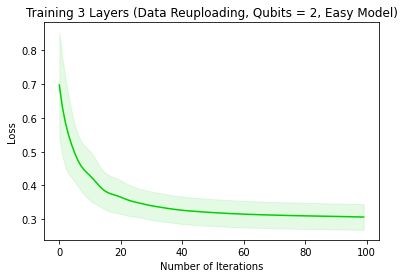

In [21]:
import matplotlib.pyplot as plt

stddevs =[]
averages =[]
sd = np.std(loss, axis=0)
av = np.average(loss, axis=0)
plt.plot(range(100), av)
plt.fill_between(range(100), av+np.array(sd), av-np.array(sd), alpha=0.1)
stddevs.append(sd)
averages.append(av)

plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.title("Training 3 Layers (Data Reuploading, Qubits = 2, Easy Model)")